<a href="https://colab.research.google.com/github/PLEX-GR00T/Pose_Estimation/blob/main/Workout_Pose_2D_JumpingJacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [32]:
# Upload first your data before execute these code below
path_workout = "/content/drive/MyDrive/295A/JumpingJacks.csv"; # change this
path_other = "/content/drive/MyDrive/295A/Negative_sample_hurt.csv"; # change this
name_class = "Jumping_Jacks" # change this
# change resolution if you using video with different resolution
resolution = { 
    "width": 640,
    "height": 360
}

In [33]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [34]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,415.465313,181.839793,419.408391,181.214818,423.049872,183.793750,423.433839,180.764653,410.899716,184.131307,...,402.506313,225.974581,441.656825,279.005182,378.859797,280.620123,464.279536,331.607019,352.574886,331.006411
1,413.116813,122.750127,418.039777,118.829353,408.845387,118.377610,422.691367,121.520373,402.618130,120.783946,...,395.561783,213.164421,441.458448,276.419086,375.979817,277.501751,457.926391,326.970595,353.628405,329.276082
2,411.096481,100.051178,416.234954,96.592153,407.424933,96.196490,422.910921,103.757810,402.512417,103.111363,...,393.906855,195.195695,435.888646,260.511656,376.183537,260.642402,452.261252,316.001402,361.871877,315.215987
3,404.368739,104.338220,408.928811,100.714877,399.009695,100.457942,414.371202,105.637179,393.506236,105.500663,...,389.572172,200.332491,411.674583,265.812377,394.279299,263.296604,403.568590,321.004999,386.750409,317.895798
4,400.888750,119.322393,405.677691,114.872967,395.911723,114.336689,411.119520,120.089758,390.537026,118.809574,...,387.231167,209.345010,411.101563,273.053766,393.306703,272.824044,404.244595,323.870688,385.067994,323.620321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,337.637162,108.145057,342.210145,103.723184,333.585126,104.097700,348.192764,108.163948,328.916803,108.440152,...,327.410448,199.537127,350.036691,257.051302,331.635184,256.367506,348.135490,315.126481,330.543740,313.945633
2547,278.944206,129.768359,284.248385,125.360003,274.303816,124.375849,288.726527,129.390511,267.784702,128.168108,...,263.643926,218.263409,306.168735,272.763563,241.038024,275.610171,326.596514,325.486712,217.570832,326.423297
2548,274.104731,126.023789,278.805022,122.467973,270.990084,122.219238,283.371072,126.994073,265.246827,127.145491,...,263.370240,218.510519,302.686153,267.230930,243.690820,270.234660,315.934258,302.916677,222.357607,317.754042
2549,277.658166,127.505706,281.612833,123.342912,274.250389,122.538793,288.033705,127.443528,266.131429,126.756629,...,262.660282,222.168248,303.519649,270.176100,243.034866,273.209915,319.482754,308.263982,226.908111,307.190467


In [35]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,532.308365,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,612.211568,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,659.413646,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,611.818734,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,535.062218,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [36]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,415.465313,181.839793,419.408391,181.214818,423.049872,183.793750,423.433839,180.764653,410.899716,184.131307,...,225.974581,441.656825,279.005182,378.859797,280.620123,464.279536,331.607019,352.574886,331.006411,Jumping_Jacks
1,413.116813,122.750127,418.039777,118.829353,408.845387,118.377610,422.691367,121.520373,402.618130,120.783946,...,213.164421,441.458448,276.419086,375.979817,277.501751,457.926391,326.970595,353.628405,329.276082,Jumping_Jacks
2,411.096481,100.051178,416.234954,96.592153,407.424933,96.196490,422.910921,103.757810,402.512417,103.111363,...,195.195695,435.888646,260.511656,376.183537,260.642402,452.261252,316.001402,361.871877,315.215987,Jumping_Jacks
3,404.368739,104.338220,408.928811,100.714877,399.009695,100.457942,414.371202,105.637179,393.506236,105.500663,...,200.332491,411.674583,265.812377,394.279299,263.296604,403.568590,321.004999,386.750409,317.895798,Jumping_Jacks
4,400.888750,119.322393,405.677691,114.872967,395.911723,114.336689,411.119520,120.089758,390.537026,118.809574,...,209.345010,411.101563,273.053766,393.306703,272.824044,404.244595,323.870688,385.067994,323.620321,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,337.637162,108.145057,342.210145,103.723184,333.585126,104.097700,348.192764,108.163948,328.916803,108.440152,...,199.537127,350.036691,257.051302,331.635184,256.367506,348.135490,315.126481,330.543740,313.945633,Jumping_Jacks
2547,278.944206,129.768359,284.248385,125.360003,274.303816,124.375849,288.726527,129.390511,267.784702,128.168108,...,218.263409,306.168735,272.763563,241.038024,275.610171,326.596514,325.486712,217.570832,326.423297,Jumping_Jacks
2548,274.104731,126.023789,278.805022,122.467973,270.990084,122.219238,283.371072,126.994073,265.246827,127.145491,...,218.510519,302.686153,267.230930,243.690820,270.234660,315.934258,302.916677,222.357607,317.754042,Jumping_Jacks
2549,277.658166,127.505706,281.612833,123.342912,274.250389,122.538793,288.033705,127.443528,266.131429,126.756629,...,222.168248,303.519649,270.176100,243.034866,273.209915,319.482754,308.263982,226.908111,307.190467,Jumping_Jacks


In [37]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,415.465313,181.839793,419.408391,181.214818,423.049872,183.793750,423.433839,180.764653,410.899716,184.131307,...,225.974581,441.656825,279.005182,378.859797,280.620123,464.279536,331.607019,352.574886,331.006411,Jumping_Jacks
1,413.116813,122.750127,418.039777,118.829353,408.845387,118.377610,422.691367,121.520373,402.618130,120.783946,...,213.164421,441.458448,276.419086,375.979817,277.501751,457.926391,326.970595,353.628405,329.276082,Jumping_Jacks
2,411.096481,100.051178,416.234954,96.592153,407.424933,96.196490,422.910921,103.757810,402.512417,103.111363,...,195.195695,435.888646,260.511656,376.183537,260.642402,452.261252,316.001402,361.871877,315.215987,Jumping_Jacks
3,404.368739,104.338220,408.928811,100.714877,399.009695,100.457942,414.371202,105.637179,393.506236,105.500663,...,200.332491,411.674583,265.812377,394.279299,263.296604,403.568590,321.004999,386.750409,317.895798,Jumping_Jacks
4,400.888750,119.322393,405.677691,114.872967,395.911723,114.336689,411.119520,120.089758,390.537026,118.809574,...,209.345010,411.101563,273.053766,393.306703,272.824044,404.244595,323.870688,385.067994,323.620321,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,413.140189,98.088531,417.703521,93.360542,408.811567,92.828174,422.947321,97.012431,403.432934,96.767288,...,189.431678,421.984586,254.315420,394.625003,253.239757,416.600412,309.269786,391.684678,309.296110,Jumping_Jacks
1411,412.166667,104.303618,416.962656,100.545877,408.039035,99.890015,422.331859,105.166890,402.409198,102.836724,...,197.101224,419.561120,261.326625,398.077764,257.482781,410.300484,314.621098,392.889577,312.159982,Jumping_Jacks
1412,413.077825,112.012076,417.774777,107.344931,408.167348,107.153626,423.521758,112.103841,402.785453,111.702756,...,202.774521,417.679093,268.093840,400.242572,264.232406,408.318396,321.118951,393.642690,317.523119,Jumping_Jacks
1413,412.132651,121.974255,416.596451,117.514675,407.188046,117.020915,422.751299,121.558961,402.012446,121.109788,...,212.000903,416.300229,275.982462,397.372899,274.083736,407.599529,323.427197,390.666863,320.595752,Jumping_Jacks


In [38]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904,other
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337,other
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506,other
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591,other
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [39]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,415.465313,181.839793,419.408391,181.214818,423.049872,183.793750,423.433839,180.764653,410.899716,184.131307,...,225.974581,441.656825,279.005182,378.859797,280.620123,464.279536,331.607019,352.574886,331.006411,Jumping_Jacks
1,413.116813,122.750127,418.039777,118.829353,408.845387,118.377610,422.691367,121.520373,402.618130,120.783946,...,213.164421,441.458448,276.419086,375.979817,277.501751,457.926391,326.970595,353.628405,329.276082,Jumping_Jacks
2,411.096481,100.051178,416.234954,96.592153,407.424933,96.196490,422.910921,103.757810,402.512417,103.111363,...,195.195695,435.888646,260.511656,376.183537,260.642402,452.261252,316.001402,361.871877,315.215987,Jumping_Jacks
3,404.368739,104.338220,408.928811,100.714877,399.009695,100.457942,414.371202,105.637179,393.506236,105.500663,...,200.332491,411.674583,265.812377,394.279299,263.296604,403.568590,321.004999,386.750409,317.895798,Jumping_Jacks
4,400.888750,119.322393,405.677691,114.872967,395.911723,114.336689,411.119520,120.089758,390.537026,118.809574,...,209.345010,411.101563,273.053766,393.306703,272.824044,404.244595,323.870688,385.067994,323.620321,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [40]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [41]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,415.465313,181.839793,419.408391,181.214818,423.049872,183.793750,423.433839,180.764653,410.899716,184.131307,...,402.506313,225.974581,441.656825,279.005182,378.859797,280.620123,464.279536,331.607019,352.574886,331.006411
1,413.116813,122.750127,418.039777,118.829353,408.845387,118.377610,422.691367,121.520373,402.618130,120.783946,...,395.561783,213.164421,441.458448,276.419086,375.979817,277.501751,457.926391,326.970595,353.628405,329.276082
2,411.096481,100.051178,416.234954,96.592153,407.424933,96.196490,422.910921,103.757810,402.512417,103.111363,...,393.906855,195.195695,435.888646,260.511656,376.183537,260.642402,452.261252,316.001402,361.871877,315.215987
3,404.368739,104.338220,408.928811,100.714877,399.009695,100.457942,414.371202,105.637179,393.506236,105.500663,...,389.572172,200.332491,411.674583,265.812377,394.279299,263.296604,403.568590,321.004999,386.750409,317.895798
4,400.888750,119.322393,405.677691,114.872967,395.911723,114.336689,411.119520,120.089758,390.537026,118.809574,...,387.231167,209.345010,411.101563,273.053766,393.306703,272.824044,404.244595,323.870688,385.067994,323.620321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


In [42]:
y

0       Jumping_Jacks
1       Jumping_Jacks
2       Jumping_Jacks
3       Jumping_Jacks
4       Jumping_Jacks
            ...      
2825            other
2826            other
2827            other
2828            other
2829            other
Name: class, Length: 2830, dtype: object

In [43]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [44]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [45]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.649165,0.505111,0.655326,0.503374,0.661015,0.510538,0.661615,0.502124,0.642031,0.511476,...,0.628916,0.627707,0.690089,0.775014,0.591968,0.779500,0.725437,0.921131,0.550898,0.919462
1,0.645495,0.340973,0.653187,0.330082,0.638821,0.328827,0.660455,0.337557,0.629091,0.335511,...,0.618065,0.592123,0.689779,0.767831,0.587468,0.770838,0.715510,0.908252,0.552544,0.914656
2,0.642338,0.277920,0.650367,0.268312,0.636601,0.267212,0.660798,0.288216,0.628926,0.286420,...,0.615479,0.542210,0.681076,0.723643,0.587787,0.724007,0.706658,0.877782,0.565425,0.875600
3,0.631826,0.289828,0.638951,0.279764,0.623453,0.279050,0.647455,0.293437,0.614853,0.293057,...,0.608707,0.556479,0.643242,0.738368,0.616061,0.731379,0.630576,0.891681,0.604298,0.883044
4,0.626389,0.331451,0.633871,0.319092,0.618612,0.317602,0.642374,0.333583,0.610214,0.330027,...,0.605049,0.581514,0.642346,0.758483,0.614542,0.757845,0.631632,0.899641,0.601669,0.898945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0.510612,1.083607,0.460329,1.147046,0.467996,1.178444,0.471628,1.137148,0.490829,1.187755,...,0.909140,1.093004,1.072915,0.596789,1.151071,1.060423,1.227274,0.315581,1.016659,1.341157
2826,0.478093,1.062686,0.452144,1.057624,0.444571,1.074844,0.441043,1.054116,0.457429,1.175915,...,0.906516,1.054649,1.068139,0.591206,1.173140,1.077118,1.232883,0.311352,1.011956,1.346956
2827,0.490320,1.168533,0.461769,1.154762,0.478264,1.204318,0.474831,1.121172,0.514817,1.224627,...,0.909052,1.128191,1.076949,0.626741,1.143083,1.125285,1.234721,0.295563,1.380035,1.099508
2828,0.491787,1.142435,0.469028,1.130297,0.483343,1.171735,0.480268,1.087700,0.506639,1.183456,...,0.893454,1.099659,1.070716,0.577049,1.151173,1.088440,1.243809,0.295324,1.369178,1.101079


### One Hot Encoding

In [46]:
y = pd.get_dummies(y).values
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

### Split Dataset

In [47]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 2264
The number of test data X is: 566
The number of train data y is : 2264
The number of test daya y is : 566
The total dataset is : 2830


## Modelling

In [49]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2240      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [52]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [53]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
36/36 [==============================] - 1s 7ms/step - loss: 0.7385 - accuracy: 0.4982 - val_loss: 0.6552 - val_accuracy: 0.5071
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5119 - val_loss: 0.6182 - val_accuracy: 0.5071
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.6122 - val_loss: 0.5652 - val_accuracy: 0.8198
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.6966 - val_loss: 0.5032 - val_accuracy: 0.8993
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7800 - val_loss: 0.4056 - val_accuracy: 0.8657
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.8313 - val_loss: 0.3347 - val_accuracy: 0.9399
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8746 - val_loss: 0.2439 - val_accuracy: 0.9682
Epoch 8/200
3

## Visualization Acc & Loss

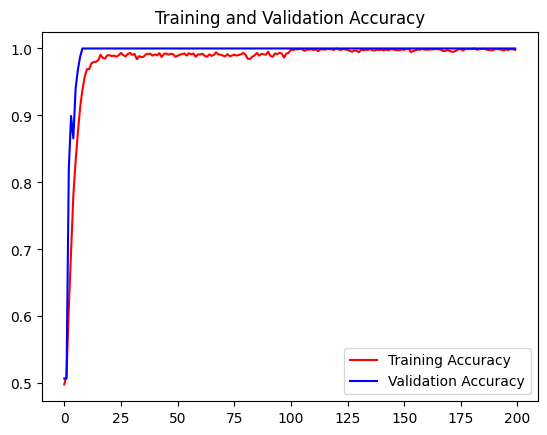

<Figure size 640x480 with 0 Axes>

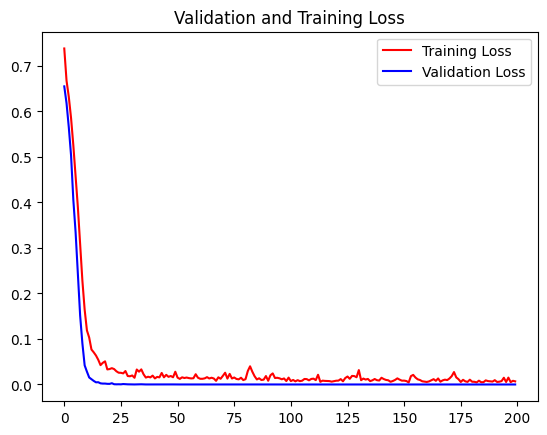

<Figure size 640x480 with 0 Axes>

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 4.066439274197364e-08
Test accuracy: 1.0


## Test Prediction

In [56]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
2789,0.782826,0.990433,0.74793,0.871764,0.74914,0.984214,0.75312,0.868186,0.71344,0.983079,...,1.149386,1.005127,1.283903,0.56586,1.386243,1.131759,1.493271,0.349502,1.489649,1.249701


In [57]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [58]:
df_data['class'].unique()

array(['Jumping_Jacks', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [59]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 58ms/step


In [60]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
Jumping_Jacks


## Export Model

In [61]:
# Download this file for backup
model.save("model.h5")

In [62]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 43.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

In [63]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-04-06 21:54:41.396392: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 21:54:41.396676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 21:54:41.396694: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [64]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)
  adding: content/tfjs_float_model_workout/model.json (deflated 78%)


Don't forget to download tfjs model (check relatable folder)